In [1]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
df= pd.read_csv(r'C:/Users/ASUS/Desktop/Data_Science_Internship - Dump.csv',index_col=0)

In [3]:
df= df.drop_duplicates()

In [4]:
df['source']= df['source'].replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0',np.nan)
df['source_city']= df['source_city'].replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0',np.nan)
df['source_country']= df['source_country'].replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0',np.nan)
df['utm_source']= df['utm_source'].replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0',np.nan)
df['utm_medium']= df['utm_medium'].replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0',np.nan)
df['des_city']= df['des_city'].replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0',np.nan)
df['des_country']= df['des_country'].replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0',np.nan)
df['source_country']= df['source_country'].replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0',np.nan)
df['lead_id']= df['lead_id'].replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0',np.nan)

In [5]:
ls=['LOST','WON']
df= df[df['status'].isin(ls)]

In [6]:
df= df.drop('room_type',axis=1)

In [7]:
lost= df[df['status']=='LOST']

In [8]:
lost.isna().sum()

Agent_id              0
status                0
lost_reason           0
budget             3608
lease              2278
movein            12974
source             5776
source_city        8274
source_country     8070
utm_source           58
utm_medium         2710
des_city           2468
des_country        2468
lead_id               0
dtype: int64

In [9]:
lost= lost.dropna()

In [10]:
lost.shape

(21011, 14)

In [11]:
won= df[df['status']=='WON']

In [12]:
df.groupby(['status']).count()

,Agent_id,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
status,,,,,,,,,,,,,
LOST,43235,43235,39627,40957,30261,37459,34961,35165,43177,40525,40767,40767,43235
WON,3072,0,2993,3016,2441,2902,2525,2530,3069,2599,3012,3012,3072


In [13]:
won.shape

(3072, 14)

In [14]:
won.isna().sum()

Agent_id             0
status               0
lost_reason       3072
budget              79
lease               56
movein             631
source             170
source_city        547
source_country     542
utm_source           3
utm_medium         473
des_city            60
des_country         60
lead_id              0
dtype: int64

In [15]:
won.isna().sum()

Agent_id             0
status               0
lost_reason       3072
budget              79
lease               56
movein             631
source             170
source_city        547
source_country     542
utm_source           3
utm_medium         473
des_city            60
des_country         60
lead_id              0
dtype: int64

In [16]:
won['budget']=won['budget'].fillna(won['budget'].mode()[0])
won['lease']=won['lease'].fillna(won['lease'].mode()[0])
won['movein']=won['movein'].fillna(won['movein'].mode()[0])
won['source']=won['source'].fillna(won['source'].mode()[0])
won['source_city']=won['source_city'].fillna(won['source_city'].mode()[0])
won['source_country']=won['source_country'].fillna(won['source_country'].mode()[0])
won['utm_source']=won['utm_source'].fillna(won['utm_source'].mode()[0])
won['utm_medium']=won['utm_medium'].fillna(won['utm_medium'].mode()[0])
won['des_city']=won['des_city'].fillna(won['des_city'].mode()[0])
won['des_country']=won['des_country'].fillna(won['des_country'].mode()[0])


In [17]:
won= won.drop('lost_reason',axis=1)
lost= lost.drop('lost_reason',axis=1)

In [18]:
new_df= pd.concat([won,lost])

In [19]:
new_df.shape

(24083, 13)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [21]:
le= LabelEncoder()

In [22]:
X= new_df.drop('status',axis=1)
y= new_df['status']

In [23]:
X= X.apply(lambda x: le.fit_transform(x))

In [24]:
y= le.fit_transform(y)

In [25]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19266, 12)
(4817, 12)
(19266,)
(4817,)


In [26]:
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [27]:
# To rank all features

chi_ls = []

for feature in X_train.columns:
    
    # create contingency table
    c = pd.crosstab(y_train, X_train[feature])
    
    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

Text(0.5, 1.0, 'Feature importance based on chi-square test')

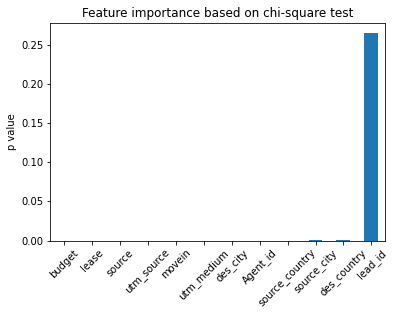

In [28]:
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')

In [29]:
selected = pd.Series(chi_ls, index=X_train.columns).sort_values(
    ascending=True)[0:10].index

selected

Index(['budget', 'lease', 'source', 'utm_source', 'movein', 'utm_medium',
       'des_city', 'Agent_id', 'source_country', 'source_city'],
      dtype='object')

In [30]:
X_test= X_test[selected]
X_train=X_train[selected]

In [31]:
models={'LogisticRegression':LogisticRegression(),
        'DecisionTree': DecisionTreeClassifier(),
        'Random_foresest': RandomForestClassifier(),
        'K-Nearest': KNeighborsClassifier(n_neighbors=3),
        'Gaussian': GaussianNB(),
        'SVM': SVC(),
        'Adaboost': AdaBoostClassifier()}

In [32]:
train_score={}
test_score={}
y_train_pred={}
y_test_pred={}

for name,model in models.items():
    model.fit(X_train,y_train)
    train_score[name]=model.score(X_train,y_train)
    test_score[name]= model.score(X_test,y_test)
    y_train_pred[name]= model.predict(X_train)
    y_test_pred[name]= model.predict(X_test)

In [33]:
print('Train_score:',train_score)
print('\n')
print('Test_score:',test_score)

Train_score: {'LogisticRegression': 0.8864320564725423, 'DecisionTree': 0.9997923803591819, 'Random_foresest': 0.9997404754489775, 'K-Nearest': 0.9154988061870653, 'Gaussian': 0.8177618602719817, 'SVM': 0.8857053877296792, 'Adaboost': 0.9050140143257552}


Test_score: {'LogisticRegression': 0.8835374714552626, 'DecisionTree': 0.8384886859040896, 'Random_foresest': 0.9090720365372639, 'K-Nearest': 0.8714967822296035, 'Gaussian': 0.808802159020137, 'SVM': 0.8835374714552626, 'Adaboost': 0.9022212995640441}


In [34]:
df= pd.DataFrame(test_score,index=['Test_accuracy'])
df=df.transpose()

In [35]:
df['Train_accuracy']=train_score.values()
df['Difference']= (df['Train_accuracy']-df['Test_accuracy'])
df

,Test_accuracy,Train_accuracy,Difference
LogisticRegression,0.883537,0.886432,0.002895
DecisionTree,0.838489,0.999792,0.161304
Random_foresest,0.909072,0.999740,0.090668
K-Nearest,0.871497,0.915499,0.044002
Gaussian,0.808802,0.817762,0.008960
SVM,0.883537,0.885705,0.002168
Adaboost,0.902221,0.905014,0.002793


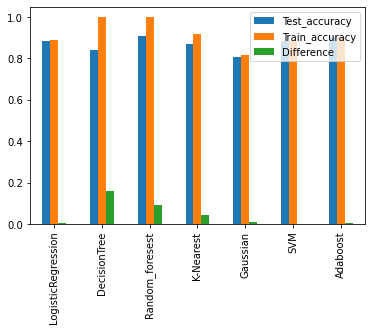

In [36]:
df.plot.bar();

In [37]:
lr= LogisticRegression()

In [38]:
lr.fit(X_train,y_train)

LogisticRegression()

In [39]:
cv_acc= cross_val_score(lr,X,y,cv=10,scoring='accuracy')
cv_acc=np.mean(cv_acc)
cv_acc

0.8830301720155177

In [40]:
cv_pre= cross_val_score(lr,X,y,cv=10,scoring='precision')
cv_pre= np.mean(cv_pre)
cv_pre

0.6928921090151636

In [41]:
cv_recall= cross_val_score(lr,X,y,cv=10,scoring='recall')
cv_recall=np.mean(cv_recall)
cv_recall

0.146494141038115

In [42]:
cv_f1= cross_val_score(lr,X,y,cv=10,scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

0.24036265331202147

In [43]:
cv_metric= {'Accuracy': cv_acc,
           'Precision': cv_pre,
           'Recall': cv_recall,
           'F1': cv_f1}

cv_metric

{'Accuracy': 0.8830301720155177,
 'Precision': 0.6928921090151636,
 'Recall': 0.146494141038115,
 'F1': 0.24036265331202147}

In [44]:
df_2= pd.DataFrame(cv_metric,index=['Result'])
df_2=df_2.T

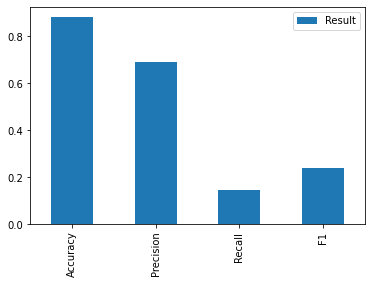

In [45]:
df_2.plot.bar();

In [46]:
y_pred= lr.predict(X_test)
y_prob= lr.predict_proba(X_test)

In [47]:
y_prob

array([[0.94783582, 0.05216418],
       [0.92923949, 0.07076051],
       [0.78799397, 0.21200603],
       ...,
       [0.96045549, 0.03954451],
       [0.92523931, 0.07476069],
       [0.95363616, 0.04636384]])

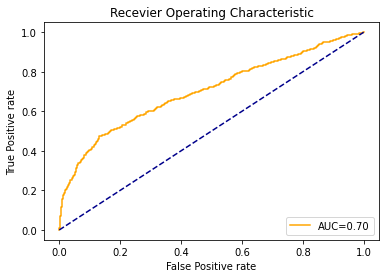

In [48]:
positive_prob=y_prob[:,1]
fpr,tpr,threshold= roc_curve(y_test,positive_prob)
roc_auc= auc(fpr,tpr)
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate');

In [49]:
ada= AdaBoostClassifier()

In [50]:
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [51]:
cv_acc= cross_val_score(ada,X,y,cv=10,scoring='accuracy')
cv_acc=np.mean(cv_acc)
cv_acc

0.8995545669685523

In [52]:
cv_pre= cross_val_score(ada,X,y,cv=10,scoring='precision')
cv_pre= np.mean(cv_pre)
cv_pre

0.772285105820531

In [53]:
cv_recall= cross_val_score(ada,X,y,cv=10,scoring='recall')
cv_recall=np.mean(cv_recall)
cv_recall

0.310546131393037

In [54]:
cv_f1= cross_val_score(ada,X,y,cv=10,scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

0.4399477321845279

In [55]:
cv_metric= {'Accuracy': cv_acc,
           'Precision': cv_pre,
           'Recall': cv_recall,
           'F1': cv_f1}

cv_metric

{'Accuracy': 0.8995545669685523,
 'Precision': 0.772285105820531,
 'Recall': 0.310546131393037,
 'F1': 0.4399477321845279}

In [56]:
df_2= pd.DataFrame(cv_metric,index=['Result'])
df_2=df_2.T

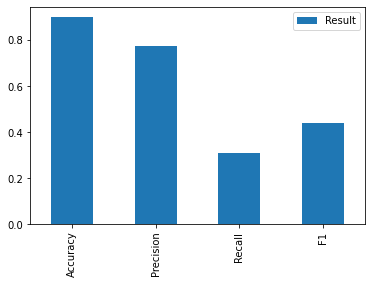

In [57]:
df_2.plot.bar();

In [58]:
y_pred= ada.predict(X_test)
y_prob= ada.predict_proba(X_test)

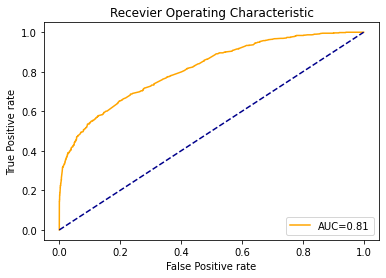

In [59]:
positive_prob=y_prob[:,1]
fpr,tpr,threshold= roc_curve(y_test,positive_prob)
roc_auc= auc(fpr,tpr)
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate');